<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/2020_chapter07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
***
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # 学習済み単語ベクトルのダウンロード
# FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
# FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

In [ ]:
! pip install -q nlpia

In [ ]:
from nlpia.data.loaders import get_data
from gensim.models import KeyedVectors

In [ ]:
model = KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
***
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
model.similarity('United_States','U.S.')

0.73107743

## 62. 類似度の高い単語10件
***
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar('United_States',topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
***
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
model.most_similar(positive=['Spain','Athens'],negative=['Madrid'],topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
***
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-11-06 07:16:09--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.2’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2021-11-06 07:16:09 (196 MB/s) - ‘questions-words.txt.2’ saved [603955/603955]



In [ ]:
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
      print(category)
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [ ]:
!head -10 questions-words-add.txt

## 65. アナロジータスクでの正解率
***
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open('./questions-words-add.txt','r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0

  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cun +=1
      if line[4] == line[5]:
        sem_cor += 1

      else:
        syn_cnt += 1
        if line[4] == line[5]:
          syn_cor += 1
print(f'意味的アナロジー正解率':{sem_cor / sem_cun:.3f})
print(f'文法的アナロジー正解率':{syn_cor / syn_cun:.3f})




## 66. WordSimilarity-353での評価
***
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-11-06 07:50:24--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2021-11-06 07:50:25--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   121KB/s    in 0.2s    

2021-11-06 07:50:26 (121 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open ('./combined.csv', 'r') as f:
  next(f)
  for line in f:
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0],line[1]))
    ws353.append(line)

  for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
 np.array(ws353)[2]

array(['tiger', 'tiger', '10.00', '0.99999994'], dtype='<U14')

In [ ]:
 np.array(ws353).T[2]

In [ ]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数：{correlation:.3f}')

スピアマン相関係数：0.685


In [ ]:
import pandas as pd
from tqdm import tqdm

def culcSimScore(row):
  word1 = row['Word 1']
  word2 = row['Word 2']
  if word1 in model and word2 in model:
    score = model.similarity(word1,word2)
  else:
    score = None
  return score

tqdm.pandas()
df = pd.read_csv('combined.csv')
df['SimScore'] = df.progress_apply(culcSimScore,axis = 1)

print(df[["Human (mean)", "SimScore"]].corr(method="spearman"))

100%|██████████| 353/353 [00:00<00:00, 19581.41it/s]

              Human (mean)  SimScore
Human (mean)      1.000000  0.700017
SimScore          0.700017  1.000000


##67. k-meansクラスタリング
***
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
countries[44]

'Iran'

In [ ]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]#numpy.where()→条件式のindexを取得
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Samoa
cluster 1
Australia, Jordan, Iraq, Vietnam, Pakistan, Japan, Canada, China, Thailand, Egypt, Afghanistan, Lebanon
cluster 2
Belize, Gambia, Burundi, Mali, Madagascar, Nigeria, Eritrea, Ghana
cluster 3
Sweden, Germany, Algeria, Finland, Hungary, Slovakia, Spain, France, England, Switzerland, Greece, Norway, Romania, Italy, Belgium, Serbia
cluster 4
Azerbaijan, Turkey, Russia, Cuba, Kazakhstan, Kyrgyzstan, Turkmenistan, Iran


## 68. Ward法によるクラスタリング
***
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

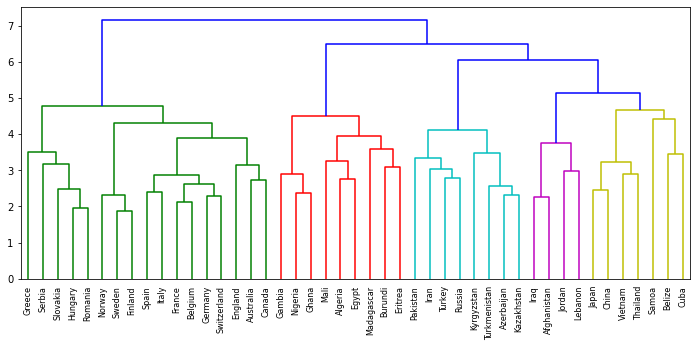

In [ ]:
plt.figure(figsize=(12,5))
Z = linkage(countries_vec, method = 'ward')
dendrogram(Z,labels = countries)
plt.show()

## 69. t-SNEによる可視化
***
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [ ]:
! pip install -q bhtsne

     |████████████████████████████████| 86 kB 2.4 MB/s 


In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2,rand_seed = 123)
plt.figure(figsize=(10,10))
plt.scatter(np.array(embedded).T[0],np.rray(embedded).T[1])
for (x,y) ,name in zip(embedded,countries):
  plt.annotate(name,(x,y))
plt.show()